# Expectation model plots

## Preliminaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from scipy.stats import norm

sns.set_context("talk")

## Expectation model

In [2]:
df = pd.read_csv("../outputs/observed_variants_stats_synonymous.tsv", sep="\t")

/home/alex/miniconda3/ukb/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


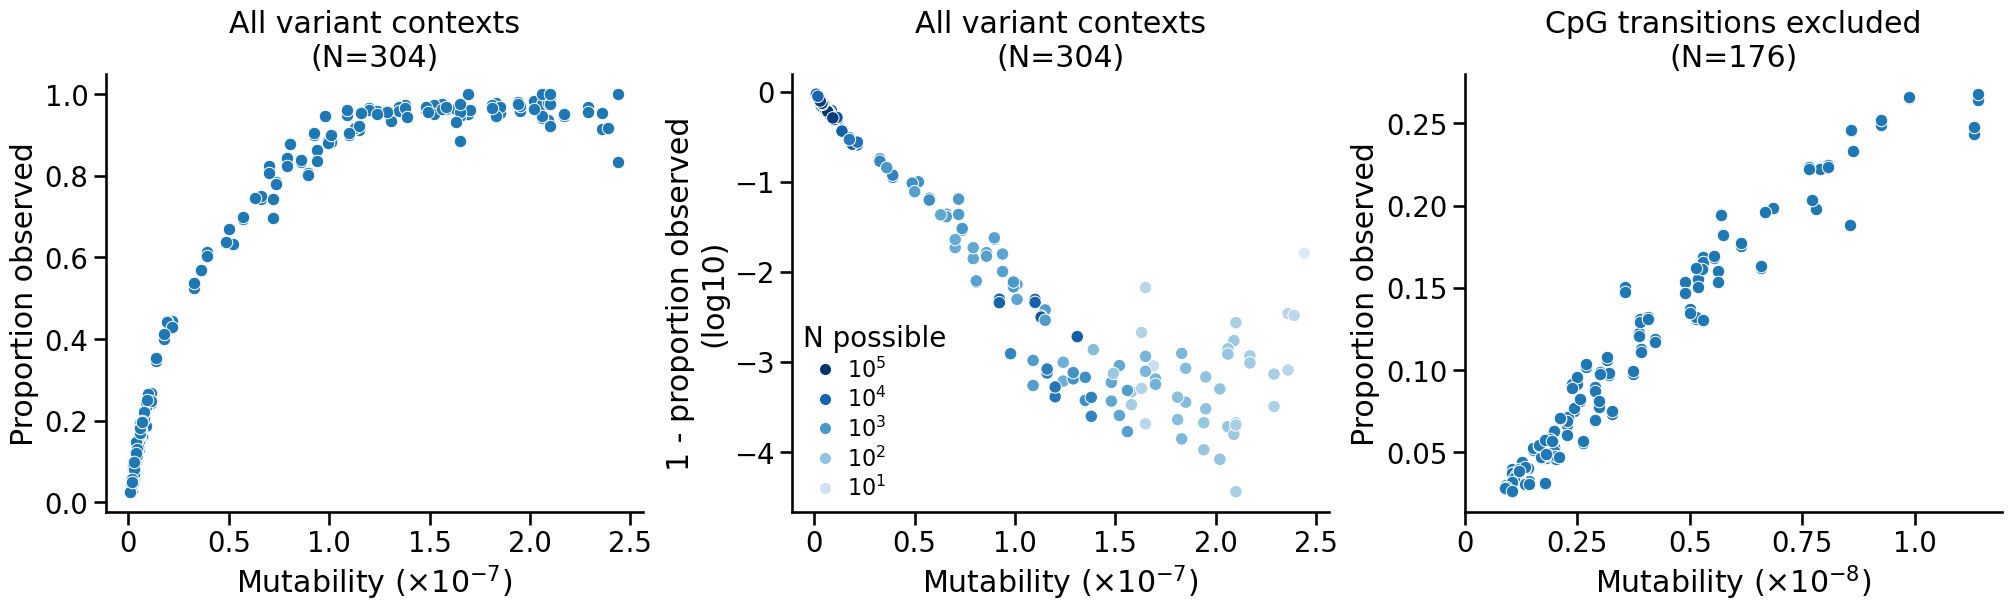

In [3]:
sns.set_context("talk", font_scale=1.2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6), layout="constrained")

# Axes 1
sns.scatterplot(
    ax=ax1,
    data=df,
    x=df["mu"],
    y=df["obs"] / df["pos"],
)
ax1.set_ylabel("Proportion observed")
ax1.set_title("All variant contexts\n(N=304)")
ax1.set_xlabel(r"Mutability ($\times 10^{-7}$)")
ax1.set_xticks(
    [0, 5 * 10**-8, 10**-7, 1.5 * 10**-7, 2 * 10**-7, 2.5 * 10**-7]
)
ax1.set_xticklabels([0, 0.5, 1.0, 1.5, 2.0, 2.5])

# Axes 2
sns.scatterplot(
    ax=ax2,
    data=df,
    x=df["mu"],
    y=np.log(1 - df["obs"] / df["pos"]),
    hue=np.log10(df["pos"]),
    hue_norm=(0, max(np.log10(df["pos"]))),
    palette="Blues",
)
ax2.set_ylabel("1 - proportion observed\n(log10)")
ax2.set_title("All variant contexts\n(N=304)")
ax2.set_xlabel(r"Mutability ($\times 10^{-7}$)")
ax2.set_xticks(
    [0, 5 * 10**-8, 10**-7, 1.5 * 10**-7, 2 * 10**-7, 2.5 * 10**-7]
)
ax2.set_xticklabels([0, 0.5, 1.0, 1.5, 2.0, 2.5])

## Axes 2 legend
cmap = plt.cm.Blues
legend_elements = [
    Line2D([0], [0], marker="o", color="w", markerfacecolor=cmap(0.2), label="$10^1$"),
    Line2D([0], [0], marker="o", color="w", markerfacecolor=cmap(0.4), label="$10^2$"),
    Line2D([0], [0], marker="o", color="w", markerfacecolor=cmap(0.6), label="$10^3$"),
    Line2D([0], [0], marker="o", color="w", markerfacecolor=cmap(0.8), label="$10^4$"),
    Line2D([0], [0], marker="o", color="w", markerfacecolor=cmap(0.99), label="$10^5$"),
]

ax2.legend(
    title="N possible",
    handles=legend_elements[::-1],
    frameon=False,
    alignment="left",
    labelspacing=0.2,
    handletextpad=0,
    title_fontsize=20,
    fontsize=16,
    loc="lower left",
    borderpad=0,
)

# Axes 3
sns.scatterplot(
    ax=ax3,
    data=df[df.variant_type != "CpG"],
    x="mu",
    y=df["obs"] / df["pos"],
)
ax3.set_ylabel("Proportion observed")
ax3.set_title("CpG transitions excluded\n(N=176)")
ax3.set_xlabel(r"Mutability ($\times 10^{-8}$)")
ax3.set_xticks([0, 2.5 * 10**-9, 5 * 10**-9, 7.5 * 10**-9, 1 * 10**-8])
ax3.set_xticklabels(
    [
        0,
        0.25,
        0.5,
        0.75,
        1.0,
    ]
)

# Figure
for ax in ax1, ax2, ax3:
    ax.spines["top"].set_color("None")
    ax.spines["right"].set_color("None")

plt.savefig("../plots/expecation_model_by_cpg.svg", format="svg")